## Introduction
####  Data analysis & visualiztion on the skills of data scientists from the job description of 2 hiring websites

In [61]:
from __future__ import print_function
import pandas as pd
import numpy as np

# Text preprocessing
import os,re

# Disable warning of 3 types
import warnings

#Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import altair as alt
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


# Other utils
from tqdm import tqdm  # Progress bar
from datetime import datetime
from dateutil import parser

#EDA tools.
import dtale

# nlp text cleaning
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer # or LancasterStemmer, RegexpStemmer, SnowballStemmer

# Transformers
from transformers import pipeline
import ipywidgets as widgets
from transformers import pipeline
from sentence_transformers import SentenceTransformer

# Clustering algorithms
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import LatentDirichletAllocation
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.stem.snowball import SnowballStemmer

# Visualizing text
import spacy
import scattertext

In [2]:
# load main table only including the jobs of data scientists
ds_file= './01_data/output/datascientists.csv'
df_main=pd.read_csv(ds_file)
df_main['id']=df_main['id'].astype('int64')

In [3]:
# Drop the duplicated job postings 
df_main.drop_duplicates(subset=['employer','description','title','location'],inplace=True)

In [4]:
# load skills produced by azure
az_skills= './01_data/output/az_skills.csv'
df_skills=pd.read_csv(az_skills)

In [5]:
df_skills=df_skills[df_skills['category'].isin(['Skill','Product','Person'])]

In [6]:
len(df_skills)

26602

In [7]:
# Drop the duplicated skills in the same job description
df_skills.drop_duplicates(subset=['id','skill'],inplace=True)

In [8]:
len(df_skills)

22743

In [9]:
df_skills['id']=df_skills['id'].astype('int64')

In [10]:
df_id_cnt=df_skills.groupby(['id']).count()['skill']
df_id_cnt=df_id_cnt.reset_index()

In [11]:
df_id_cnt.describe()

,id,skill
count,7.580000e+02,758.000000
mean,4.144643e+09,30.003958
std,6.832706e+07,18.772960
min,3.716076e+09,1.000000
25%,4.112985e+09,16.250000
50%,4.169677e+09,28.500000
75%,4.194223e+09,40.000000
max,4.210952e+09,107.000000


In [12]:
df_skills_cnt=df_skills.groupby(['skill']).count()['id']
df_skills_cnt=df_skills_cnt.reset_index()

In [13]:
df_skills_cnt.sort_values('id',ascending=False)

,skill,id
2497,machine learning,479
1123,data,404
4107,statistics,364
533,business,359
3460,python,352
...,...,...
2754,model production,1
2755,model productization pipelines,1
2756,model prototypes,1
1104,customer-interfacing,1


In [14]:
# Perform EDA to check main table
d0 = dtale.show(df_main)
d0.open_browser()

## Embedding-based clustering analysis

In [15]:
onlinemodel='bert-large-nli-mean-tokens'
embedder = SentenceTransformer(onlinemodel)

2022-05-23 20:57:42,957 - INFO     - Load pretrained SentenceTransformer: bert-large-nli-mean-tokens
2022-05-23 20:58:17,837 - INFO     - Use pytorch device: cpu


In [194]:
#queries = list(jobs['job_desc'][0:30])
queries = list(df_skills['skill'].unique())
query_embeddings = embedder.encode(queries)

In [212]:
df_skills['skill'].apply(lambda x:remove_sim(queries.index(x),queries,query_embeddings) )

KeyboardInterrupt: 

In [211]:
queries[queries.index('active learning')]

'active learning'

In [204]:
map=[]
for i in range(len(queries)):
    map.append(remove_sim(i,queries,query_embeddings))

3787 0.8760559 technologie-themen technical science
528 0.9445923 artificial intelligence artificial intelligence models
1032 0.98513436 machine learning machine learning.
3 0.99999976 datasets datasets
690 0.95337164 cybersecurity cyber security
5 0.99999994 developing developing
6 0.9999998 interactive visualisation interactive visualisation
7 0.9999999 visual analytics visual analytics
8 0.99999976 data visualisation data visualisation
9 0.9999998 data science data science
622 0.980281 natural language processing natural language processing technology
2604 0.8275783 visualisationsupported disambiguation
286 0.87987363 active learning proactive thinking
835 0.97160304 research researches
4004 0.9484347 information visualisation information processing
3367 0.9852294 python python.
16 0.9999999 development development
17 0.9999999 big data big data
18 0.9999999 interactive interactive
969 0.9498373 deploying deploy
1449 0.98414904 maintaining maintain
4062 0.9729557 data data.
22 0.999

206 0.99999976 distributions distributions
1574 0.98489374 statistical testing statistical tests
1975 0.9745476 regression regressions
3830 0.9713267 probability methods probability analysis
852 0.8291708 conditional probability probability
2116 0.9753426 software engineering software design
1408 0.8621087 computability correlative
4167 0.9130434 operations research operations management
2044 0.87119496 linear algebra linear programming
1624 0.88306475 sets setup
217 0.9999999 big big
218 0.99999976 cloud computing cloud computing
57 0.9822022 tensorflows tensorflow
220 0.99999994 pytorch pytorch
2698 0.98194826 dataset data set
3822 0.9177305 economic economic trends
223 0.9999998 validate validate
1050 0.9711614 test tests
225 0.99999976 data science models data science models
226 0.9999999 supply supply
100 0.953045 system systems
228 0.99999964 innovation innovation
229 0.9999998 business operation business operation
230 0.9999996 electrical electrical
1919 0.9790184 computer engin

407 0.9999997 client impact client impact
1563 0.8741718 pool table pooling
3015 0.945886 beers beer
411 0.9999998 wine wine
412 0.99999976 mac mac
4350 0.9409198 pc pc computing
414 0.9999999 nintendo switch nintendo switch
428 0.9234276 operational operationalize
3281 0.96624404 information systems information system
1537 0.9495745 data quality data accuracy
1098 0.9923547 business processes business process
422 0.9999998 machine learning experiments machine learning experiments
3564 0.9006223 pilot piloting
424 0.9999999 model metrics model metrics
3116 0.9806993 iteratively iterative
426 0.9999999 model performance model performance
1851 0.94314903 interpret interpreting
2465 0.9419179 operationalize operational processes
395 0.98333555 presentations presentation
799 0.9641278 ai ai.
3671 0.98281497 automation automation.
419 0.9611938 information technology information systems
1912 0.9288104 trial data trial protocol
3627 0.87384564 data wrangling data problems
2242 0.92537904 mod

609 0.9999999 relationship extraction relationship extraction
610 0.9999999 entity linking entity linking
730 0.9195312 entity recognition named entity recognition
732 0.97976506 topic modelling topic modeling
614 0.99999976 product life-cycle product life-cycle
19 0.9212847 deployment deploying
616 0.9999996 software components software components
617 0.9999999 technical discussions technical discussions
618 0.99999994 agile processes agile processes
749 0.9242472 health insurance health care
620 0.9999999 delivery logic delivery logic
2841 0.8891449 search logic search technologies
622 0.9999999 natural language processing technology natural language processing technology
1577 0.87634754 travel content travel modelling
2792 0.95161915 pricing logic pricing strategies
625 0.9999998 international conferences international conferences
626 0.99999994 neurips neurips
628 0.9216853 icml iclr
628 0.9999999 iclr iclr
979 0.96150166 commercialization commercialize
630 0.9999999 data assets da

123 0.9928771 visualizations visualization
4333 0.8708631 senior senior management
1788 0.9321556 information retrieval information extraction
3052 0.9176302 compliance verification
522 0.9675649 assess evaluate
797 0.99999976 provide insights provide insights
1052 0.91158754 robotic process automation robotic design
430 0.9641278 ai. ai
806 0.92638195 audit services audit
1369 0.9040326 internal audit internal decision-making
2298 0.97446954 normalizing normalize
3385 0.85439837 engagement planning action plans
2723 0.963937 coordination coordinating
3118 0.9369065 ai procedures ai models
800 0.92638195 audit audit services
534 0.9636369 reports report
475 0.89365315 procedures practices
1423 0.94515777 teamwork team work
810 0.99999994 cooperating cooperating
476 0.91387045 lead leading
812 0.9999999 monitor monitor
3895 0.9144617 follow up procedures verification procedures
814 0.9999999 action action
4158 0.9077092 compliance audits quality assurance testing
523 0.94755197 techniqu

864 0.96928805 mathematically mathematical
2337 0.977672 optimization models optimization strategies
986 0.99999994 exploratory data analysis exploratory data analysis
987 0.9999998 ph ph
3328 0.9232273 d dv
989 0.99999994 professional professional
2304 0.9277702 matching relevance matching
991 0.9999997 aggregation aggregation
992 0.9999998 bayesian techniques bayesian techniques
3874 0.927407 revenue revenue generation
994 0.9999998 database design database design
4326 0.96379846 model build model-building
119 0.9869491 statistical methods statistical techniques
997 0.99999994 experiment design experiment design
2407 0.91763103 presenting showcasing
999 0.99999994 banking banking
1371 0.86381257 payments reimbursement
561 0.8680242 capital markets financial market
3303 0.94114435 asset management asset management business
1003 0.99999976 risk risk
554 0.83527416 financial crime financial industry
46 0.9664705 strategy strategies
1825 0.8882426 consult advise
4508 0.9458703 governance

3363 0.922546 product intelligence product vision
204 0.83941305 conversion transformation
1179 0.99999976 computation computation
1180 0.99999994 machine learning modeling machine learning modeling
994 0.9763762 database architectures database design
1846 0.988768 statistical programming language statistical programming languages
1183 0.99999976 pattern discovery pattern discovery
1184 0.99999994 root cause analysis root cause analysis
2388 0.9619408 unix unix-based
2678 0.93392944 verbal verbal communication
1187 0.9999999 articulate articulate
2876 0.97618693 ai methods ai technologies
119 0.9744344 statistical concepts statistical techniques
2478 0.9241854 image recognition image data
1191 0.9999999 manufacturing manufacturing
1192 0.9999999 deep neural networks deep neural networks
1420 0.963778 solution development solution design
1412 0.9722029 system architecture system design
1195 0.99999994 statistical data modelling statistical data modelling
2540 0.97489643 quality control 

2069 0.8785758 affiliates association
3516 0.9399438 evidence generation strategies evidence generation
3426 0.91499895 internal decision-making internal functions
3767 0.9699106 prioritisation prioritise
1000 0.86381257 reimbursement payments
1379 0.9853169 epidemiology epidemiological
3849 0.845496 pharmacoepidemiology immunology
1374 0.99999976 outcomes research outcomes research
1375 0.99999994 health services research health services research
1376 0.9999999 public health public health
1377 0.99999976 biostatistics biostatistics
1378 0.9999998 observational research observational research
1379 0.99999976 epidemiological epidemiological
445 0.93778956 entrepreneurial mindset entrepreneurial
1381 0.9999998 self-direction self-direction
1382 0.99999976 teach teach
2111 0.9499874 self-directed self-motived
4272 0.9611045 technical leadership technical direction
2847 0.9774797 marketing science marketing sciences
1386 0.99999976 innovating innovating
1387 0.9999999 data requirements dat

2544 0.905923 social network analysis social media analytics
1552 0.99999994 querying databases querying databases
3836 0.974733 inspire inspires
3543 0.8070841 alternative ideation
1555 0.99999976 decisioning decisioning
2408 0.92937183 guiding guidance
1825 0.92588377 recommendation advise
644 0.9632604 demand modelling demand forecasting
2277 0.9609947 optimization algorithms optimization techniques
953 0.88383657 vehicle transportation
807 0.8736412 dispatch reports
4314 0.9457088 routing routing structures
1563 0.9999999 pooling pooling
1318 0.9634595 improvement improve
1565 0.99999976 visualise visualise
1566 0.99999994 scalable machine learning infrastructure scalable machine learning infrastructure
1839 0.9320987 food meal
1568 0.9999999 delivery data delivery data
1569 0.99999994 large scale large scale
4314 0.872162 routing algorithms routing structures
1571 0.9999999 computer languages. computer languages.
1572 0.99999964 decision tree learning decision tree learning
779 0.

2908 0.97775054 investment investments
1746 0.99999976 embeddings embeddings
3062 0.9356952 interpretability methods interpretability
1748 0.99999994 inferential statistics inferential statistics
1749 0.9999999 pca pca
1548 0.98385525 forests forest
2215 0.9793141 big data system architectures big data systems
1752 0.99999964 digital technologies digital technologies
3774 0.8454257 aerospace aviation
1036 0.9448477 business experience business knowledge
768 0.9516175 rshiny sqirl
635 0.9730614 platforms platform
1757 0.9999997 self-starter self-starter
1758 0.9999999 intellectual curiosity intellectual curiosity
1759 0.9999998 time series data time series data
4021 0.8903803 saas fastai
217 0.9482541 big machines big
1762 0.99999976 machines machines
1763 0.99999994 machine sensor machine sensor
3673 0.88226473 self self-assessment
34 0.976284 data pipeline data pipelines
1766 0.99999994 database concepts database concepts
2863 0.98621345 container technology container technologies
176

1926 0.9999999 radiology radiology
148 0.8541491 pathology oncology
4058 0.873146 h&e h2o
1930 0.99999994 microscopy images microscopy images
1931 0.99999994 imaging imaging
470 0.8553165 thought thinking
1933 0.9999998 execution execution
3253 0.9921509 credit risk models credit risk model
1935 0.9999999 developing response models developing response models
1935 0.9577595 calibrating response models developing response models
1937 0.9999998 model validation model validation
1938 0.9999999 brainstorming brainstorming
4490 0.94710016 qualitative qualitative data
3309 0.8117415 bash jamppers
1581 0.8552848 figures structured
1942 0.99999994 process improvement process improvement
385 0.91280496 vendor management product management
2599 0.8777731 selection categorization
1945 0.9999998 catalog quality catalog quality
405 0.9571595 customer research customer analysis
1947 0.9999999 benchmarking benchmarking
3212 0.9911004 validate models validating models
3266 0.9443797 data science strate

2112 0.9999998 automated testing automated testing
2113 0.9999999 neural nets neural nets
1183 0.8262218 sequential pattern discovery pattern discovery
1705 0.9393125 statistical packages statistical software
542 0.98277473 software design software development
2117 0.9999998 refactoring refactoring
2118 0.99999994 resolving resolving
2662 0.9818503 work working
1856 0.84234136 project lifecycle tooling package technical concepts
974 0.854411 enterprise prototyping
2122 0.9999999 ml techniques ml techniques
2230 0.84214735 shipping predictive data shipping
2124 0.9999998 services management services management
2125 0.9999999 operational software operational software
3325 0.89041936 liquidity risk financial risk
1934 0.9125403 interest rate risk management credit risk models
2202 0.8569902 trade execution trading
2129 0.9999999 funding optimization funding optimization
295 0.95954823 pricing analytics pricing analyses
2131 0.9999998 behavioral models behavioral models
4338 0.8562256 hedg

3001 0.92877007 aggregating data aggregating
4516 0.8226254 caffe 2, caffe2,
3026 0.90845215 sparkml spark mllib
3882 0.9021979 extract extracting
2298 0.99999994 normalize normalize
1676 0.90788424 ir re
176 0.93775463 publications publication
730 0.9838625 named-entity recognition named entity recognition
725 0.89234763 elasticsearch elastic search
3803 0.8362354 lucene meddra
990 0.9277702 relevance matching matching
501 0.9716649 delivering deliver
2306 0.9999999 commercial management commercial management
2307 0.9999998 commercial strategies commercial strategies
2308 0.99999976 tactics tactics
2309 0.99999976 promotional promotional
857 0.8039838 roi analysis analyses
2312 0.9999997 data flow data flow
2313 0.9999999 business admin business admin
2314 0.9999999 pharmaceutical industry pharmaceutical industry
2315 0.9999999 account management account management
2316 0.99999994 longitudinal longitudinal
206 0.9552816 distribution distributions
2318 0.9999999 omics analysis omics an

2756 0.90364206 sequence data sequencing data
2480 0.9999999 tensorboard tensorboard
2481 0.9999999 building data pipelines building data pipelines
2482 0.99999976 training pipelines training pipelines
2483 0.99999994 flask flask
4169 0.97999626 relational database platforms relational database software
2486 0.9999998 tsql tsql
2487 0.99999994 build solutions build solutions
997 0.9706851 design experiments experiment design
3710 0.9526807 data-analytics data-modeling
2490 0.99999994 technical strategies technical strategies
3413 0.8785652 geo-statistics geo data
4625 0.8905498 geography geographical data
2493 0.99999994 persuade persuade
3809 0.89671254 variable reduction dimension reduction
2495 0.9999999 geographic cluster recognition geographic cluster recognition
3819 0.9777775 network analysis network modeling
2802 0.8933597 spatio-temporal analysis temporal data structures
2499 0.9999999 dynamic dynamic
1513 0.8636786 discrete event discrete event simulation
2979 0.9697931 heuri

2659 0.9999999 accountable accountable
2660 0.99999976 creatively creatively
1070 0.97920084 web platform web applications
2662 0.9999999 working working
2500 0.83338 remotely discrete event
2664 0.9999999 compass compass
2665 0.99999964 humility humility
1498 0.8878634 empathy empathetic
2667 0.9999999 continuous continuous
4442 0.8400012 experimentation cycle experimentation methodology
3137 0.8646555 human resources employment
2670 0.9999999 staffing staffing
4664 0.9288597 data st data etl
1350 0.9768545 notebook notebooks
2673 0.9999997 extracting insights extracting insights
2152 0.9365299 bayesian probability bayesian statistical methods
2675 0.99999976 pr pr
941 0.9544493 media outlets media
2740 0.9437099 marketing software marketing automation
1186 0.93392944 verbal communication verbal
4131 0.9372157 mobile mobile platforms
1058 0.97763765 architectures architecture.
281 0.9092621 primary market research market research
489 0.9444219 consulting staff consulting
2683 0.999999

2840 0.9999998 architectural plans architectural plans
2841 0.9999999 search technologies search technologies
1331 0.98063433 users user
4383 0.94056094 hypothesis generation hypothesis analysis
1115 0.9617748 analytical function analytical processing
2847 0.99999994 marketing sciences marketing sciences
2848 0.99999994 a/b a/b
2849 0.9999997 predictive analysis predictive analysis
2850 0.99999976 presto presto
2164 0.94257635 bioinformatic bioinformatics
1491 0.96922886 scripting languages scripting language
2853 0.9999998 software research software research
3865 0.925287 deployment pipelines analysis pipelines
2855 0.9999999 open source technologies open source technologies
527 0.934399 validate requirements validating
1322 0.82091993 troubleshoot deployments troubleshooting
2858 0.99999994 secure secure
2859 0.99999994 proactive monitoring proactive monitoring
2860 0.9999999 alerting alerting
61 0.83689356 documenting sops debugging
2343 0.93056715 knowledge transfer knowledge prese

1530 0.9904094 modern programming languages modern programming language
3030 0.99999994 e-commerce- e-commerce-
3020 0.9717022 implementing algorithms developing algorithms
354 0.82461363 marketplace integrity ethical
3033 0.9999998 dynamics dynamics
351 0.9167077 time value analysis time management
4614 0.84476715 key cypher
2546 0.8569678 cohort analysis classification models
3038 0.9999999 a/b testing a/b testing
2673 0.96057314 extract insights extracting insights
4405 0.9182499 analytics notebooks analyst notebook
2278 0.9252454 visual data presentations visualization technologies
3042 0.99999964 pivot tables pivot tables
1131 0.91858244 advanced functions advanced
3790 0.9830103 technical resources technical resource
1111 0.9469035 organize data manage data
3046 0.9999999 problem-solver problem-solver
1799 0.8917333 observation data data gathering
3048 0.99999964 observation data enrichment observation data enrichment
3566 0.9068714 quality design quality
132 0.9394674 r / r
3051

3215 0.99999994 bayesian modeling bayesian modeling
3216 0.9999999 gaussian processes gaussian processes
3217 0.99999976 boosting trees boosting trees
3218 0.99999976 ab testing ab testing
3220 0.9701773 mobile games mobile gaming
3219 0.9701773 mobile gaming mobile games
362 0.947986 data-minded data-centric
4362 0.81987584 conference tickets conference presentations
3702 0.9769885 cell phone mobile phone
3224 0.99999994 sport vouchers sport vouchers
3226 0.99999976 vision vision
3059 0.84320354 plotly ideate
312 0.9820164 insights. insights
3229 0.99999994 programmatic data analytics programmatic data analytics
1264 0.9624486 scientific knowledge scientific thinking
133 0.9794337 algorithmic research algorithmic r&d
3232 0.99999994 ai solutions ai solutions
672 0.96308863 predictive algorithms prediction algorithms
3234 0.99999994 sw development sw development
1295 0.9778706 search engine search engines
3236 0.9999999 display display
1258 0.84119725 auctioning price execution
734 0.8

3400 0.99999994 software containers software containers
3401 0.9999998 web-analytics web-analytics
2089 0.89092803 self-reliant self-organized
3403 0.9999999 analyzes analyzes
2068 0.8865153 business health business improvement
976 0.9732773 identifying identify
3406 0.99999994 vetting vetting
229 0.9825332 business operations business operation
1636 0.9475144 customer retention customer engagement
126 0.86209065 engagement modeling modelling
3410 0.99999994 data model design data model design
3411 0.9999998 data intuition data intuition
3412 0.9999999 business thought leadership business thought leadership
2987 0.92775595 geo data geo data modelling
3278 0.9376297 postgis postgres
3415 0.99999994 open dialogue open dialogue
923 0.9556568 service services
534 0.906266 report writing report
3264 0.9441052 manage projects project coordination
1830 0.95013297 utilization usage
3246 0.93501276 consumer experiences consumer
3421 0.9999999 data analysis model data analysis model
4165 0.97211

1900 0.9412618 data team data products
3767 0.9472696 prioritise requests prioritise
3585 0.9999999 modelling methods modelling methods
3586 0.9999999 deploying code deploying code
1866 0.8716245 maintaining models maintaining training
1524 0.8910773 production lifecycles production systems
3589 0.99999994 implementing models implementing models
1279 0.9396622 agile engineering agile development
4432 0.8888448 appropriate testing testability
3592 0.99999976 snowflake snowflake
2340 0.9239719 managed data stack data management systems
3594 0.9999999 cloud composer/ cloud composer/
398 0.82762665 dataflow & beam data transformation
3596 0.9999997 ai platform ai platform
3597 0.9999999 analytically curious analytically curious
3598 0.99999976 impact driven impact driven
294 0.86339605 automate scoring automate
3601 0.9999999 tree based methods tree based methods
3589 0.9160222 deploying models implementing models
2421 0.96869326 analytics architecture analytics models
530 0.9462577 custom

3763 0.99999976 jupiter jupiter
3764 0.99999976 neural net neural net
3765 0.99999994 genetic algorithm genetic algorithm
1778 0.9046416 negotiator negotiation
1370 0.9699106 prioritise prioritisation
2822 0.9879255 meeting deadlines meet deadlines
6 0.95776963 interactive documents interactive visualisation
3715 0.979334 data-driven applications data-driven systems
3771 0.9999999 computational engineering computational engineering
1489 0.81039774 transformers robotics
2766 0.8044124 perishable inventory inventory
3774 0.9999998 aviation aviation
3775 0.9999999 business understanding business understanding
4394 0.9469651 data understanding data-informed mindset
931 0.9367533 model evaluation model development
427 0.86580503 explain interpret
3779 0.9999999 communicated communicated
3780 0.99999994 python libraries python libraries
3781 0.9999999 ml libraries ml libraries
122 0.92366755 federated analytics analytics
3094 0.9197581 federated learning learning mindset
3210 0.99772596 data

1204 0.9007094 empathic gestionar
1549 0.90598285 enthusiastic boosting
3947 0.9999999 data platforms data platforms
3948 0.9999999 business decision-making business decision-making
2339 0.9673329 enterprise data warehousing enterprise data warehouse
3950 0.99999976 big data implementations big data implementations
3528 0.95732033 scientific consulting scientific research
3952 0.99999976 feasibility feasibility
1030 0.86522573 survival and resilience
3034 0.8274082 duration analysis time value analysis
1215 0.92770207 resource- resources
289 0.9431237 database query languages database applications
1770 0.98857665 agile approach agile methods
1980 0.9781252 language classes language courses
953 0.8135173 journeys transportation
656 0.938694 search queries search
3961 0.9999999 user-intent user-intent
3962 0.9999999 data processing pipelines data processing pipelines
3963 0.9999998 production models production models
3988 0.9652511 process pipelines processing pipelines
2766 0.85920584 c

893 0.84505314 mvc hdfs
1451 0.9212376 proposal generation proposal development
2300 0.9021407 statements publications
2647 0.84319764 rfp/rfq creation entity extraction
4138 0.99999994 machines learning machines learning
3712 0.97454256 proposing propose
4140 0.9999999 data-cleaning data-cleaning
3710 0.9899553 data-modelling data-modeling
4142 0.99999994 data-processing data-processing
3185 0.93804634 micro-services microstrategy
4144 0.99999994 rest-apis rest-apis
4145 0.9999999 queueing systems queueing systems
745 0.89840233 inter process communication interfacing
1466 0.9387493 graphana graph analysis
4088 0.96263343 conversational conversational interface
2131 0.9266287 behavioral segmentation frameworks behavioral models
3874 0.8383139 profitability analyses revenue generation
3276 0.92355204 ad hoc reporting ad-hoc analysis
1329 0.9758037 statistical analytical statistical interpretation
4154 0.9999998 ols ols
188 0.91554403 multinomial logistic regression logistic regression


4664 0.9288904 dataviz data etl
3503 0.9302222 causes cause
4309 0.9999999 analytical mind-set analytical mind-set
2277 0.98010224 optimization systems optimization techniques
4311 0.9999998 scientific libraries scientific libraries
4312 0.99999994 object oriented language object oriented language
4313 0.9999999 build models build models
1562 0.9457088 routing structures routing
4090 0.9202756 monitoring infrastructure infrastructure management
4316 0.99999976 mathematical optimization mathematical optimization
4462 0.87584776 mcmc algorithms algorithms implementation
4318 0.9999999 latent factor models latent factor models
4319 0.9999998 dynamic programming dynamic programming
4320 0.9999998 optimization. optimization.
3276 0.8275529 underwrite ad-hoc analysis
512 0.8957557 client profile client services
4091 0.98109865 english language proficiency english proficiency
1686 0.90547657 administer functions
4326 0.99999976 model-building model-building
606 0.8680093 expert responsible
43

4492 0.99999994 monitor performance monitor performance
4189 0.92027825 insights presentations reporting insights
4494 0.99999994 reporting structures reporting structures
4495 0.9999999 best practice best practice
2361 0.9385427 organizational efficiency operational efficiency
3420 0.88254577 consumer satisfaction consumer experiences
4231 0.9849749 story-telling. story-telling
903 0.9502535 analyticalmethods analytical methods
2073 0.91104966 applicablepharma result-oriented
4501 0.99999994 mindsetand mindsetand
2083 0.9817945 data-driven decision making data-driven decisions
842 0.9336159 businesses businesss
4504 0.99999976 advanced computing advanced computing
4505 0.9999999 delivering insights delivering insights
2462 0.90772295 articulation articulating
4507 0.9999998 business governance business governance
4508 0.9999999 governance framework governance framework
3326 0.93194836 oil oil &
4510 0.99999994 gas gas
1135 0.8450726 power generation powerbi
3907 0.9650766 sourcing dat

17 0.9820521 big data set big data
2913 0.8876261 consumer lifecycle management consumer analytics
3190 0.8186716 digital touchpoint efficiency measurement digital solutions
2693 0.8887118 sociology social science
3749 0.85412526 ee merch
3732 0.99148166 distributed computing systems distributed computing platforms
1057 0.90097636 technique selection methodologies
4687 0.9999997 agiler agiler
124 0.9652748 algorithmes algorithm


In [205]:
def remove_sim(i,queries,embeddings,threshold=0.9):
    np_em=np.array(embeddings)
    sim=cosine_similarity([embeddings[i]],np_em[0:])
    
    sim[np.where(sim>=1)]=0
    #print(sim)
    x=np.argmax(sim)
    
    if sim[0][x]>=threshold:
        #print(x,sim[0][x],queries[i],queries[x])
        return queries[x]
    else:
        return queries[i]


k:  1 sse:  716559.125
k:  2 sse:  671495.625
k:  3 sse:  647437.4375
k:  4 sse:  628110.1875
k:  5 sse:  613801.8125
k:  6 sse:  600881.875
k:  7 sse:  590714.1875
k:  8 sse:  581465.625
k:  9 sse:  572999.25
k:  10 sse:  566081.0
k:  11 sse:  559290.5625
k:  12 sse:  552609.0
k:  13 sse:  546049.3125
k:  14 sse:  540040.375


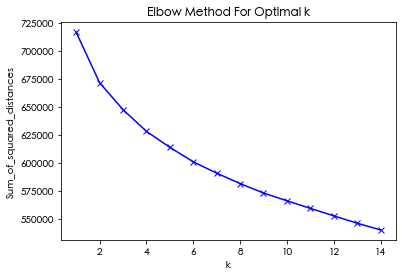

array([12,  7,  7, ...,  4,  2,  7], dtype=int32)

In [17]:

# Elbow criterion - Determine optimal numbers of clusters by elbow rule.
def elbow_plot(data, maxK=15, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = []
    K= range(1, maxK)
    for k in K:
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            #data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            #data["clusters"] = kmeans.labels_
        print("k: ", k,"sse: ",kmeans.inertia_)
        # Inertia: Sum of distances of samples to their closest cluster center
        sse.append(kmeans.inertia_)
    plt.figure()
    plt.plot(K,sse,'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return kmeans.labels_

# Run Elbow
elbow_plot(query_embeddings)

In [18]:
# As clustering algorithm KMeams is a perfect fit.
num_clusters = 3
clf = KMeans(n_clusters=num_clusters, 
            max_iter=100, 
            init='k-means++', 
            n_init=1)
clf.fit_predict(query_embeddings)
cluster_assignment = clf.labels_

cdf=pd.DataFrame(columns=["cluster_id","sentence_id","sentence"])

for i in range(len(cluster_assignment)):
    new_row=pd.Series(data={"cluster_id":cluster_assignment[i],
                                "sentence_id":i,
                                "sentence":queries[i]
                           }
                            )
    cdf=cdf.append(new_row,ignore_index=True)

cdf.head()

,cluster_id,sentence_id,sentence
0,0,0,technologie-themen
1,0,1,artificial intelligence
2,0,2,machine learning
3,0,3,datasets
4,0,4,cybersecurity


In [19]:
# Perform EDA to check clustering result
d1 = dtale.show(cdf)
d1.open_browser()

In [20]:
# Using PCA to reduce the dimension to project the result to 2-d scatter plot

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(query_embeddings)

df_pca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

df_pca['skills']=queries

In [21]:
# Perform EDA to check clustering result
d2 = dtale.show(df_pca)
d2.open_browser()
# Using PCA, it could not clearly identify different group

In [22]:
# Combine PCA results with K-means results to see clustering
df_k=df_pca.merge(cdf,right_on=['sentence'],left_on=['skills'])

In [23]:
# Perform EDA to check clustering result
d3 = dtale.show(df_k)
d3.open_browser()

In [24]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df_main['description_cln'])
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df_main['description_cln'])

In [25]:
# Using LDA to cluster skills
lda_tf = LatentDirichletAllocation(n_components=3, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=3, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=3, random_state=0)

In [26]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.002891 -0.066478       1        1  59.770204
2     -0.115299  0.034474       2        1  24.163535
0      0.118190  0.032004       3        1  16.066261, topic_info=             Term         Freq        Total Category  logprob  loglift
1182       strong  1197.000000  1197.000000  Default  30.0000  30.0000
363           div   308.000000   308.000000  Default  29.0000  29.0000
55      analytics   595.000000   595.000000  Default  28.0000  28.0000
1166  statistical   445.000000   445.000000  Default  27.0000  27.0000
1246        tools   457.000000   457.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
50       analysis    62.654878   555.294019   Topic3  -5.2024  -0.3534
1167   statistics    60.107050   462.608496   Topic3  -5.2440  -0.2123
237      computer    56.538127   457.928709   Topic3  -5.3052  -0.2633
337       develop    53.292630   349.839751   Topic3  -5.3643  -0.0532
1214         team    54.061092   628.593392   Topic3  -5.3500  -0.6249

[265 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  0.606587  ability
1         2  0.109678  ability
1         3  0.284268  ability
2         1  0.552737     able
2         2  0.126669     able
...     ...       ...      ...
1333      2  0.530848    world
1333      3  0.174422    world
1341      1  0.804632    years
1341      2  0.132104    years
1341      3  0.064050    years

[440 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [27]:
# The above result present topic modelling may not suggest meaningful clustering.
# However, it may suggest I can combine all skills into sentence, then using topic modelling to analysis.

In [28]:
df_k

,principal component 1,principal component 2,skills,cluster_id,sentence_id,sentence
0,2.495357,-0.590511,technologie-themen,0,0,technologie-themen
1,5.631563,0.396005,artificial intelligence,0,1,artificial intelligence
2,8.102977,-1.226098,machine learning,0,2,machine learning
3,1.406417,-1.300896,datasets,0,3,datasets
4,5.521225,-2.696786,cybersecurity,0,4,cybersecurity
...,...,...,...,...,...,...
4684,-4.139788,7.150369,ee,2,4684,ee
4685,4.275712,-0.764448,distributed computing systems,0,4685,distributed computing systems
4686,-3.215190,-2.100262,technique selection,1,4686,technique selection
4687,-5.526742,2.553715,agiler,2,4687,agiler


In [29]:
    height=600
    width=800
    # Create scatter plot to display death and confirmed cases by countries
    scat=alt.Chart(df_k).mark_circle(size=100).encode(
        y=alt.Y("principal component 1", axis=alt.Axis(format='f', title='PC 1')),
        x=alt.X("principal component 2",axis=alt.Axis(format='f', title='PC 2')),
        #color=alt.condition(select_country,alt.value("red"),alt.value("#66B2FF")),
        color='cluster_id',
        tooltip=["skills"]
    ).properties(
        height=height, width=width,
        title = alt.TitleParams(text = 'Clusters of skills',
                                anchor='middle',
                                font = 'Ubuntu Mono', 
                                fontSize = 16, 
                                color = '#3E454F', 
                                )
    )
    scat

alt.Chart(...)

In [30]:
# The clustering of embedding based also has no clue on the skills clustering.

## Title-based Analysis

In [31]:
len(df_main['title'].unique())

437

In [32]:
# Convert titles to embedding
titles = list(df_main['title'].unique())
titles_embeddings = embedder.encode(titles)

k:  1 sse:  41898.21484375
k:  2 sse:  38612.82421875
k:  3 sse:  36482.91015625
k:  4 sse:  34559.453125
k:  5 sse:  33266.8515625
k:  6 sse:  32341.818359375
k:  7 sse:  31586.546875
k:  8 sse:  30814.39453125
k:  9 sse:  30239.630859375
k:  10 sse:  29683.21875
k:  11 sse:  29115.673828125
k:  12 sse:  28628.1484375
k:  13 sse:  28266.224609375
k:  14 sse:  27666.2578125


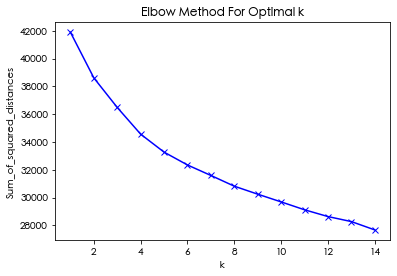

array([ 7,  4,  5,  2,  4,  0,  4,  1, 11,  9,  6,  4,  5,  5,  1,  8,  9,
       10,  4,  0,  4,  0, 10,  4,  3,  5,  5, 13,  4,  1,  5,  5,  4,  5,
        0,  6,  4,  7,  0,  1,  4,  4,  0, 10,  4,  7,  0,  6,  0,  1,  5,
        5,  8,  8,  2, 11,  4, 10,  6,  0,  4,  8,  6,  4,  1,  7,  6, 11,
        6,  0,  4,  8,  8, 11,  2,  5,  1,  5,  1,  6,  1,  5, 13,  4,  6,
        5,  4,  1,  5,  5,  1,  4,  6,  4,  4,  1,  2, 11,  4,  7,  6,  1,
        0,  7,  1,  3,  0,  1,  8,  6, 13, 10,  6,  1,  5,  0,  5, 11,  7,
        9,  0,  6,  0,  4,  6,  0,  8,  8, 13,  8,  5, 13,  6,  5,  4,  2,
        3,  4,  5, 11, 11,  6, 13,  5,  5,  4,  3,  5,  1,  0,  5, 13,  8,
        8,  8,  1, 13,  1,  8,  8,  6,  6,  8,  4, 12,  3,  5,  1, 13,  0,
        8,  8,  5,  6,  1,  0,  4, 11,  4,  6,  0,  1,  8, 13,  5,  7, 11,
        4,  8,  7,  8,  6,  0,  4, 12,  8,  8,  4,  8, 13,  6,  0, 13, 11,
        6, 11,  8,  4,  6,  5,  5,  8,  1,  5,  0,  6, 13,  4,  6,  6,  1,
        4,  0,  3,  7, 12

In [33]:
# Run Elbow to decide K for k-means
elbow_plot(titles_embeddings)

In [34]:
# As clustering algorithm KMeams is a perfect fit.
num_clusters = 3
t_clf = KMeans(n_clusters=num_clusters, 
            max_iter=100, 
            init='k-means++', 
            n_init=1)
t_clf.fit_predict(titles_embeddings)
t_cluster_assignment = t_clf.labels_

t_cdf=pd.DataFrame(columns=["cluster_id","sentence_id","sentence"])

for i in range(len(t_cluster_assignment)):
    new_row=pd.Series(data={"cluster_id":t_cluster_assignment[i],
                                "sentence_id":i,
                                "sentence":titles[i]
                           }
                            )
    t_cdf=t_cdf.append(new_row,ignore_index=True)

t_cdf.head()

,cluster_id,sentence_id,sentence
0,0,0,Young Professional Consultant (w/m/d) Analytic...
1,1,1,AI/ML Data Scientist
2,1,2,Senior Data Scientist
3,0,3,Junior Data Scientist
4,1,4,Delivery Data Scientist


In [35]:
# Using PCA to reduce the dimension to project the result to 2-d scatter plot

t_pca = PCA(n_components=2)
t_principalComponents = t_pca.fit_transform(titles_embeddings)


df_tpca = pd.DataFrame(data = t_principalComponents
             , columns = ['principal component 1', 'principal component 2'])

df_tpca['titles']=titles

In [36]:
# Combine PCA results with K-means results to see clustering
df_tk=df_tpca.merge(t_cdf,right_on=['sentence'],left_on=['titles'])

In [37]:
    height=600
    width=800
    # Create scatter plot to display death and confirmed cases by countries
    tscat=alt.Chart(df_tk).mark_circle(size=100).encode(
        y=alt.Y("principal component 1", axis=alt.Axis(format='f', title='PC 1')),
        x=alt.X("principal component 2",axis=alt.Axis(format='f', title='PC 2')),
        #color=alt.condition(select_country,alt.value("red"),alt.value("#66B2FF")),
        color=alt.Color('cluster_id', scale=alt.Scale(scheme='accent')),
        tooltip=["titles"]
    ).properties(
        height=height, width=width,
        title = alt.TitleParams(text = 'Clusters of titles',
                                anchor='middle',
                                font = 'Ubuntu Mono', 
                                fontSize = 16, 
                                color = '#3E454F', 
                                )
    )
    tscat

alt.Chart(...)

In [38]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df_main['title'])
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df_main['title'])

In [39]:
# Using LDA to cluster skills
lda_tf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=4, random_state=0)

In [40]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.250659 -0.275079       1        1  30.775448
3     -0.171171 -0.032924       2        1  25.391027
2     -0.267158 -0.012120       3        1  22.045047
1      0.187670  0.320122       4        1  21.788479, topic_info=         Term       Freq      Total Category  logprob  loglift
8        lead  55.000000  55.000000  Default  19.0000  19.0000
7      junior  38.000000  38.000000  Default  18.0000  18.0000
1   analytics  37.000000  37.000000  Default  17.0000  17.0000
13  principal  34.000000  34.000000  Default  16.0000  16.0000
9    learning  30.000000  30.000000  Default  15.0000  15.0000
..        ...        ...        ...      ...      ...      ...
5    engineer   0.266539  29.319571   Topic4  -5.8829  -3.1767
9    learning   0.268332  30.234357   Topic4  -5.8762  -3.2007
13  principal   0.268901  34.629525   Topic4  -5.8741  -3.3343
7      junior   0.264598  38.589378   Topic4  -5.8903  -3.4587
8        lead   0.265003  55.771909   Topic4  -5.8887  -3.8255

[95 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.954399     analyst
1         4  0.974477   analytics
2         4  0.950626     applied
3         2  0.945017   associate
4         2  0.639932  consultant
4         3  0.284414  consultant
5         1  0.989100    engineer
6         2  0.907733      intern
7         3  0.984727      junior
8         2  0.986160        lead
9         1  0.959174    learning
10        1  0.982161     machine
11        4  0.950340     manager
12        2  0.935687         nlp
13        3  0.981821   principal
14        1  0.920975     product
15        3  0.955123    research
16        1  0.579493     science
16        2  0.193164     science
16        4  0.193164     science
17        1  0.889701  scientists
18        4  0.950647       stage, R=19, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

In [41]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df

def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(X, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [42]:

stemmer = SnowballStemmer("english")
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [43]:
# At this point we are going to tokenize the bodies and convert them
# into a document-term matrix.

# Some note on min_df and max_df
# max_df=0.5 means "ignore all terms that appear in more then 50% of the documents"
# min_df=2 means "ignore all terms that appear in less then 2 documents"
stopwords = ENGLISH_STOP_WORDS.union(['data','scientist'])
vect = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.5, min_df=2,use_idf=True,max_features=200000, 
                       tokenizer=tokenize_only,ngram_range=(1,3))

X = vect.fit_transform(df_tk['titles'].values)
print(X.shape)
features = vect.get_feature_names()

(437, 297)


In [44]:
def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []

    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(15, 9+len(dfs)*6), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(len(dfs),3, i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

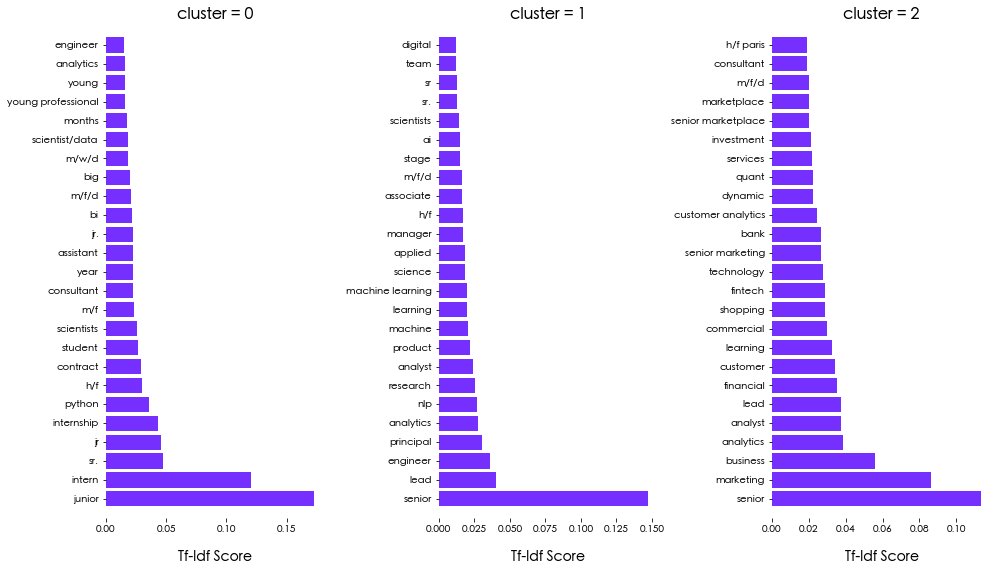

In [45]:
#Use this to print the top terms per cluster with matplotlib.
plot_tfidf_classfeats_h(top_feats_per_cluster(X, t_clf.labels_, features, 0.1, 25))

In [46]:
# The above is more than clear, the tiltes are consisted of 3 types: junior, senior, and others

In [47]:
# Perform EDA to check main table
d3 = dtale.show(df_tk)
d3.open_browser()

In [48]:
# Decide to divide the job postings into 3 types:junior, senior, and others
def ds_level(title=''):
    jr = ["junior", "jr", "jr.","intern","internship","young","student","analyst","associate"]
    sr = ["sr.","sr","senior","lead","leading","principal","president"]

    if any(x in title.lower() for x in jr):
        return "junior"

    if any(x in title.lower() for x in sr):
        return "senior"
    
    return "others"


In [49]:
df_skills

,Unnamed: 0,id,skill,category,confidence score
0,0,4148184020,technologie-themen,Skill,0.84
1,1,4148184018,technologie-themen,Skill,0.84
2,2,4203393208,artificial intelligence,Skill,0.91
3,3,4203393208,machine learning,Skill,0.83
7,7,4203393208,datasets,Skill,0.80
...,...,...,...,...,...
33281,33281,4147912611,decision tree,Skill,0.95
33282,33282,4147912611,random,Skill,0.58
33283,33283,4147912611,neural network,Skill,0.99
33284,33284,4189586963,machine learning,Skill,1.00


In [50]:
df_main['type']=df_main['title'].apply(lambda x: ds_level(x))

In [51]:
df_main['id']=df_main['id'].astype('int64')

In [52]:
df_full=df_skills.merge(df_main,how='left',left_on=['id'],right_on=['id'])

In [53]:
# Perform EDA to check main table
d4 = dtale.show(df_full)
d4.open_browser()

In [54]:
# Using scattertext to visualize the skills by types
nlp = spacy.load('en_core_web_sm')

In [55]:
    corpus = (scattertext.CorpusFromPandas(df_full,
                                           category_col='type', 
                                           text_col='skill',
                                           nlp=nlp)
              .build()
              .remove_terms(nlp.Defaults.stop_words, ignore_absences=True)
              )

In [56]:
df = corpus.get_term_freq_df()

In [57]:
df

,junior freq,others freq,senior freq
term,,,
technologie,3,0,0
themen,3,0,0
technologie themen,3,0,0
artificial,8,16,39
intelligence,13,19,57
...,...,...,...
ee,0,0,2
technique,0,0,2
technique selection,0,0,2


In [58]:
html = scattertext.produce_scattertext_explorer(
                   corpus,
                   category='senior',
                   category_name='senior',
                   not_category_name=['junior'],
                   width_in_pixels=1000,
                   )

In [59]:
#open("ds_skills.html", 'wb').write(html.encode('utf-8'))
#with open("ds_skills.html", 'w') as outf: outf.write(html)
from IPython.display import IFrame    
display(IFrame("ds_skills.html", width=900, height=650))

Executing shutdown due to inactivity...


2022-05-23 22:25:33,558 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-05-23 22:25:33,598 - INFO     - Executing shutdown...


Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/Users/gangli/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/gangli/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 1525, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/gangli/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 1523, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/gangli/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 1509, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dtale/app.py", line 410, in shutdown
    shutdown_server()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dtale/app.py", line 396, in shutdown_server
    raise Runt

2022-05-23 22:25:33,602 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/Users/gangli/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/gangli/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 1525, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/gangli/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 1523, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/gangli/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 1509, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dtale/app.py", line 410, in shutdown
    shutdown_server()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dtale/app.py", line 3

In [62]:

# data clean for data jobs
data_file= './01_Data/Output/datajobs.csv'
df_data=pd.read_csv(data_file)
# Drop the duplicated job postings 
df_data.drop_duplicates(subset=['employer','description','title','location'],inplace=True)
# Drop the job posting with same id even the above would be a little different.
df_data.drop_duplicates(subset=['id'],inplace=True)
# drop na
df_data.dropna(subset=['description'],inplace=True)
# Change string to datetime
df_data['posting_date']=df_data['posting_date'].apply(lambda x: parser.parse(x))

In [64]:
#remove data scientists job from data jobs
print(len(df_data))
ds_list=df_main['id'].unique()
df_data['id']=df_data['id']=df_data['id'].apply(lambda x: None if x in (ds_list) else x)
df_data.dropna(subset=['id'],inplace=True)
print(len(df_data))

3288
2523


In [65]:
# Convert titles to embedding
titles = list(df_data['title'].unique())
titles_embeddings = embedder.encode(titles)

k:  1 sse:  210487.046875
k:  2 sse:  195640.703125
k:  3 sse:  182158.734375
k:  4 sse:  174189.78125
k:  5 sse:  167557.140625
k:  6 sse:  162205.75
k:  7 sse:  156874.125


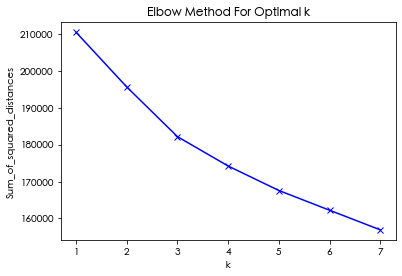

array([0, 5, 4, ..., 3, 0, 0], dtype=int32)

In [66]:
# Run Elbow to decide K for k-means
elbow_plot(titles_embeddings,maxK=8)

In [67]:
# As clustering algorithm KMeams is a perfect fit.
num_clusters = 3
t_clf = KMeans(n_clusters=num_clusters, 
            max_iter=100, 
            init='k-means++', 
            n_init=1)
t_clf.fit_predict(titles_embeddings)
t_cluster_assignment = t_clf.labels_

t_cdf=pd.DataFrame(columns=["cluster_id","sentence_id","sentence"])

for i in range(len(t_cluster_assignment)):
    new_row=pd.Series(data={"cluster_id":t_cluster_assignment[i],
                                "sentence_id":i,
                                "sentence":titles[i]
                           }
                            )
    t_cdf=t_cdf.append(new_row,ignore_index=True)

t_cdf.head()

,cluster_id,sentence_id,sentence
0,2,0,Lead Data Engineer (H/F)
1,2,1,Senior Data Engineer / Architect
2,0,2,"Summer Intern, Data Science & Engineering"
3,1,3,Data Analyst - Big Data - Energy & Utilities -...
4,1,4,Azure Big Data Azure Rapid Response Support En...


In [68]:
# Using PCA to reduce the dimension to project the result to 2-d scatter plot

t_pca = PCA(n_components=2)
t_principalComponents = t_pca.fit_transform(titles_embeddings)


df_tpca = pd.DataFrame(data = t_principalComponents
             , columns = ['principal component 1', 'principal component 2'])

df_tpca['titles']=titles

In [70]:
# Combine PCA results with K-means results to see clustering
df_tk=df_tpca.merge(t_cdf,right_on=['sentence'],left_on=['titles'])

In [71]:
# At this point we are going to tokenize the bodies and convert them
# into a document-term matrix.

# Some note on min_df and max_df
# max_df=0.5 means "ignore all terms that appear in more then 50% of the documents"
# min_df=2 means "ignore all terms that appear in less then 2 documents"
stopwords = ENGLISH_STOP_WORDS.union(['data','scientist'])
vect = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.5, min_df=2,use_idf=True,max_features=200000, 
                       tokenizer=tokenize_only,ngram_range=(1,3))

X = vect.fit_transform(df_tk['titles'].values)
print(X.shape)
features = vect.get_feature_names()

(1891, 1770)


In [72]:
    height=600
    width=800
    # Create scatter plot to display death and confirmed cases by countries
    tscat=alt.Chart(df_tk).mark_circle(size=100).encode(
        y=alt.Y("principal component 1", axis=alt.Axis(format='f', title='PC 1')),
        x=alt.X("principal component 2",axis=alt.Axis(format='f', title='PC 2')),
        #color=alt.condition(select_country,alt.value("red"),alt.value("#66B2FF")),
        color=alt.Color('cluster_id', scale=alt.Scale(scheme='accent')),
        tooltip=["titles"]
    ).properties(
        height=height, width=width,
        title = alt.TitleParams(text = 'Clusters of titles',
                                anchor='middle',
                                font = 'Ubuntu Mono', 
                                fontSize = 16, 
                                color = '#3E454F', 
                                )
    )
    tscat

alt.Chart(...)

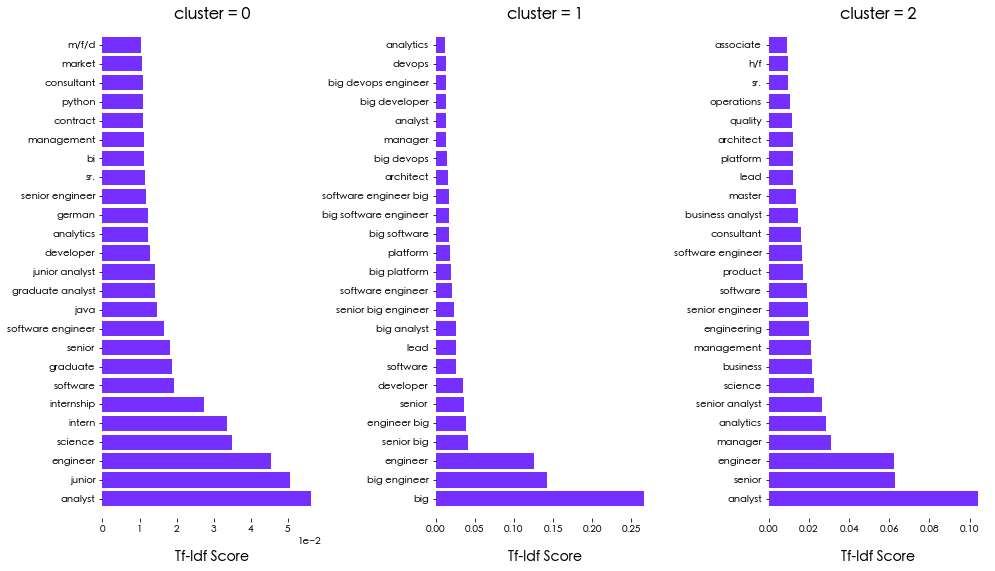

In [73]:
#Use this to print the top terms per cluster with matplotlib.
plot_tfidf_classfeats_h(top_feats_per_cluster(X, t_clf.labels_, features, 0.1, 25))

In [77]:
# Select data scientist jobs
print(len(df_data))
df_de=df_data[df_data['title'].str.contains(r'^(?=.*data)(?=.*engineer)',case=False)]
print(len(df_de))

2523
1068
